From [Audio and Digital Signal Processing](https://www.pythonforengineers.com/audio-and-digital-signal-processingdsp-in-python/)



In [6]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt
from functools import reduce

In [33]:

frequency = 1000
num_samples = 48000

sampling_rate = 48000.0
amplitude = 1600

sine_wave = np.array([np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)])

In [34]:
# save this to a file
with wave.open('sine.wav', 'w') as wav_file:
    wav_file.setparams((1, 2, int(sampling_rate), num_samples, 'NONE', 'not compressed'))
    for s in sine_wave:
        wav_file.writeframes(struct.pack('h', int(s*amplitude)))


In [35]:
# cool, now let's try something a little more complexe, with two frequency
def build_wav(frequencies=[1000, 1500], amplitude=1600, sampling_rate=48000, duration=1):
    
    waves = []
    for f in frequencies:
        waves.append([amplitude * np.sin(2 * np.pi * f * x/sampling_rate) for x in range(sampling_rate*duration)])
        
    blended = reduce(lambda x,y:map(sum, zip(x,y)), waves)
    return list(blended)

def save_wav(wave_data, sampling_rate=48000, file='wave.wav'):
    with wave.open(file, 'w') as wav_file:
        wav_file.setparams((1, 2, int(sampling_rate), len(wave_data), 'NONE', 'not compressed'))
        for w in wave_data:
            wav_file.writeframes(struct.pack('h', int(w)))
            
save_wav(build_wav(), file='wave2.wav')

In [36]:
#build_wav(frequencies=[800, 1600, 2400], file='wave3.wav')
save_wav(build_wav(frequencies=[800, 1600, 2400]), file='wave3.wav')

In [37]:
save_wav(build_wav(frequencies=[800, 1600, 2400, 900, 100, 7000]), file='wave4.wav')

frequencies: [ 1.03359407e-12+0.00000000e+00j  7.00779462e-12+7.05162070e-12j
  9.05360697e-13+7.90625007e-13j ... -5.15830148e-12+3.63501849e-12j
  9.05360697e-13-7.90625007e-13j  7.00779462e-12-7.05162070e-12j]
frequencies[999]: 2.4511874733304936e-09
frequencies[1000]: 24000.0
frequencies[1000]: (-7.713313649770827e-09-24000j)
frequencies[1001]: 2.4529239765380446e-09
The frequence is 1000 Hz


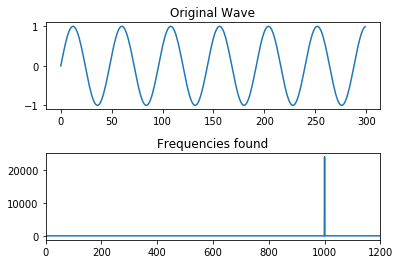

In [39]:
# pull back out from the normal sine_wave
data_fft = np.fft.fft(np.array(sine_wave))
print('frequencies: {}'.format(data_fft))
# specifcally check the 1000 Hz signal
print('frequencies[999]: {}'.format(np.abs(data_fft[999])))
print('frequencies[1000]: {}'.format(np.abs(data_fft[1000])))
print('frequencies[1000]: {}'.format(data_fft[1000]))
print('frequencies[1001]: {}'.format(np.abs(data_fft[1001])))
print('The frequence is {} Hz'.format(np.argmax(np.abs(data_fft))))

# lets plot it

plt.subplot(2,1,1)
plt.plot(sine_wave[:300])
plt.title('Original Wave')
# adds a little empty space
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,2)
plt.plot(np.abs(data_fft))
plt.title('Frequencies found')
plt.xlim(0,1200)
plt.show()

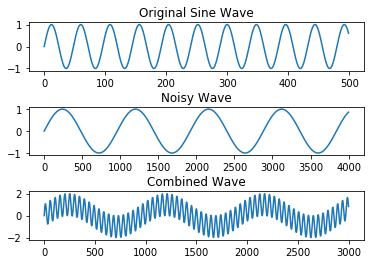

In [41]:
# lets make something a little more noisy
noise_frequency = 50
noise = np.array([np.sin(2 * np.pi * noise_frequency * x/sampling_rate) for x in range(num_samples)])

combined_signal = sine_wave + noise


plt.subplot(3,1,1)
plt.title('Original Sine Wave')
# adds a little empty space
plt.subplots_adjust(hspace=0.75)
plt.plot(sine_wave[:500])
plt.subplot(3,1,2)
plt.title('Noisy Wave')
plt.plot(noise[:4000])
plt.subplot(3,1,3)
plt.title('Combined Wave')
plt.plot(combined_signal[:3000])
plt.show()

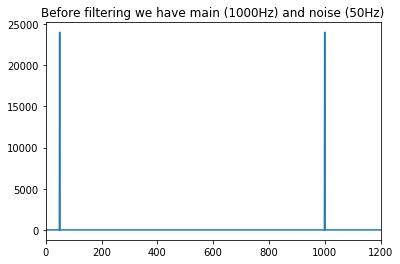

In [43]:
c_fft = np.fft.fft(combined_signal)
c_freq = np.abs(c_fft[:len(c_fft)])
plt.plot(c_freq)
plt.title('Before filtering we have main (1000Hz) and noise (50Hz)')
plt.xlim(0,1200)
plt.show()

In [48]:
#  do a little filtering

# filtered_freq = []
index = 0

# for f in c_freq:
#     # Filter between lower and upper limits
#     # Choosing 950, as closest to 1000. In real world, won't get exact numbers like these
#     if index > 950 and index < 1050:
#         # Has a real value. I'm choosing >1, as many values are like 0.000000001 etc
#         if f > 1:
#             filtered_freq.append(f)
 
#         else:
#             filtered_freq.append(0)
#     else:
#         filtered_freq.append(0)
#     index += 1

filtered_freq = [f if (950 < index < 1050 and f > 1) else 0 for index, f in enumerate(c_freq)]
print('filtered frequencies: {}'.format([(i,f) for i,f in enumerate(filtered_freq) if f>0]))

filtered frequencies: [(1000, 23999.999999999996)]
